In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [6]:
x=df.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=df.iloc[:,2:3].values
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [8]:
import matplotlib.pyplot as plt

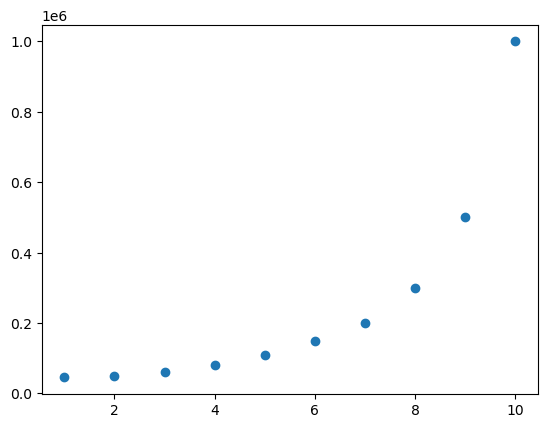

In [9]:
plt.scatter(x,y)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [11]:
plr=lr.fit(x,y)

In [12]:
lr_pred=plr.predict(x)

In [13]:
lr_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [14]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

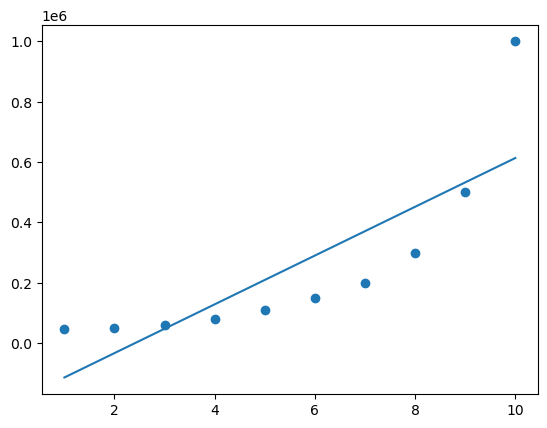

In [15]:
plt.scatter(x,y)
plt.plot(x,lr_pred)

In [16]:
#convert the normal values to polynomial features
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)
#x0,x1,x2,x3,x4
x_poly=pr.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [17]:
#associating above values with y
pr.fit(x_poly,y)

PolynomialFeatures(degree=4)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_poly,y)

LinearRegression()

In [20]:
pred=lr.predict(x_poly)

In [21]:
pred

array([[ 53356.64335681],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172497],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869452],
       [988916.08391594]])

In [22]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

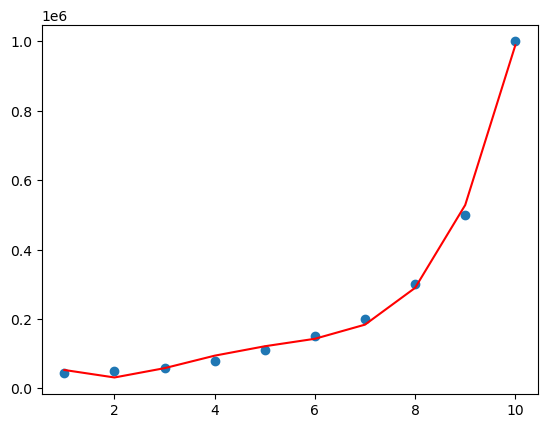

In [23]:
plt.scatter(x,y)
plt.plot(x,pred,'r')

In [24]:
y1=lr.predict(pr.fit_transform([[4]]))

In [25]:
y1

array([[94632.86713289]])

In [26]:
y2=lr.predict(pr.fit_transform([[6]]))
              
              

In [27]:
y2

array([[143275.05827508]])